In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

In [2]:
# 定义超透镜规模尺寸，以及波长大小
n=1500
gap = 400e-9
lambdad = 532e-9
x=np.linspace(-n/2*gap,n/2*gap,n)
y=np.linspace(-n/2*gap,n/2*gap,n)
X,Y=np.meshgrid(x,y)

In [3]:
# 定义相位差函数
def phi(x,y):
    return -np.pi*(fv+fh)/2/lambdad/fh/fv*(x**2+y**2)
def delta(x,y):
    return -np.pi*(fv-fh)/2/lambdad/fh/fv*(x**2+y**2)

focal length is 9483.265306122448um


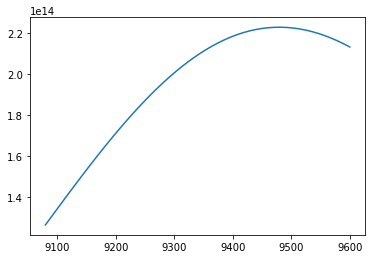

In [6]:
# 角谱法
def AS_Propagation(Uin,z,lambdad,L):
    
    nx = Uin.shape[0]
    ny = Uin.shape[1]
    x = np.linspace(-nx//2,nx//2-1,nx)
    y = np.linspace(-ny//2,ny//2-1,ny)
    X,Y=np.meshgrid(x,y)
    fx = X/L
    fy = Y/L
    k = 2*np.pi/lambdad
    q = fx**2 + fy**2
    H = np.exp(1.0j*k*z*np.sqrt(1-(lambdad**2)*q))
    O = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(Uin)))
    U = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(H*O)))
    
    return U

# 计算超透镜衍射焦距
fh=9500e-6 # 增大这个会使得H相位趋于平坦，反之趋于陡峭
fv=9180e-6
theta = np.pi*0/18
Eout = 0.5*np.exp(1j*phi(X,Y))*(np.cos(theta)*np.exp(1j*delta(X,Y))+np.sin(theta)*np.exp(-1j*delta(X,Y)))
zd = np.linspace(fv-100e-6,fh+100e-6,50)
Umax =np.zeros(50)
for i in range(50):
    z = zd[i]

    r = np.sqrt(X**2+Y**2+z**2)
    k = 2*np.pi/lambdad
    h = 1/(2*np.pi)*(z/r)*(1-1j*k*r)/(r**2)*np.exp(1j*k*r)
    H = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(h)))
    O = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(Eout)))
    U = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(H*O)))
    #U = AS_Propagation(Eout,z,lambdad,n*gap)
    Umax[i] = np.max(np.abs(U))
plt.plot(zd*1e6,Umax)
max_U = 0
for a in range(50):
    if Umax[a]>max_U:
        max_U = Umax[a]
        maxindex = a
print("focal length is "+str(zd[maxindex]*1e6)+"um")

22.448979591837087


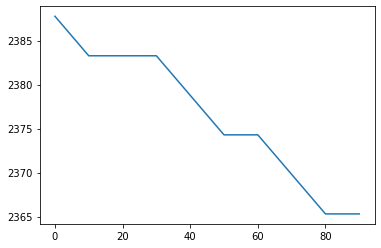

In [10]:
fh=2400e-6 # 增大这个会使得H相位趋于平坦，反之趋于陡峭
fv=2380e-6
zd = np.linspace(fv-100e-6,fh+100e-6,50)
td = np.linspace(0,90,10)
Umax =np.zeros(50)
focal_length = np.zeros(10)
for j in range(10):
    theta = np.pi*td[j]/180
    Eout = 0.5*np.exp(1j*phi(X,Y))*(np.cos(theta)*np.exp(1j*delta(X,Y))+np.sin(theta)*np.exp(-1j*delta(X,Y)))
    for i in range(50):
        z = zd[i]
        r = np.sqrt(X**2+Y**2+z**2)
        k = 2*np.pi/lambdad
        h = 1/(2*np.pi)*(z/r)*(1-1j*k*r)/(r**2)*np.exp(1j*k*r)
        H = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(h)))
        O = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(Eout)))
        U = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(H*O)))
        Umax[i] = np.max(np.abs(U))
    #plt.plot(zd,Umax)
    max_U = 0
    for a in range(50):
            if Umax[a]>max_U:
                max_U = Umax[a]
                maxindex = a
    focal_length[j] = zd[maxindex]*1e6
plt.plot(td,focal_length)
print(focal_length[0]-focal_length[9])

In [ ]:
NA = 300/6500